In [ ]:
# import required packages
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor 
import math

%matplotlib inline
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import *

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import *

%matplotlib inline
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import *

In [ ]:
from google.colab import drive

from google.colab import files
uploaded = files.upload()

Saving BA_305_Dataset.csv to BA_305_Dataset.csv


In [ ]:
NBA_df= pd.read_csv('BA_305_Dataset.csv', header=[1])
NBA_df.head()
#may need another filter for end point if goal is to determine career performance 
#if
#focus on most recent record? 
#best worst aveergae performance? whats better 
#make sure to take account number of years played in the legue... count for experience effect
#keep in mind that median of every player is on a different year.... 2007 vs 1998... there may be season related factors 
#input variables should be consistent (peoples weights and heights dont change)... pts reb and asst may not be as good to predit performance... game must have finished #use variable that is known before season started ... last season data 
#previous season before median year (find median year and subtract one from that and ask for that years variables)

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Dennis Rodman,CHI,36,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,...,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,1,Dwayne Schintzius,LAC,28,215.90,117.933920,Florida,USA,1990,1,...,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,2,Earl Cureton,TOR,39,205.74,95.254320,Detroit Mercy,USA,1979,3,...,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,3,Ed O'Bannon,DAL,24,203.20,100.697424,UCLA,USA,1995,1,...,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,4,Ed Pinckney,MIA,34,205.74,108.862080,Villanova,USA,1985,1,...,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97


In [ ]:
NBA2_df= NBA_df.drop(columns=['Unnamed: 0'])
NBA2_df

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Dennis Rodman,CHI,36,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,27,...,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,Dwayne Schintzius,LAC,28,215.90,117.933920,Florida,USA,1990,1,24,...,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,Earl Cureton,TOR,39,205.74,95.254320,Detroit Mercy,USA,1979,3,58,...,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,Ed O'Bannon,DAL,24,203.20,100.697424,UCLA,USA,1995,1,9,...,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,Ed Pinckney,MIA,34,205.74,108.862080,Villanova,USA,1985,1,10,...,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12300,Markieff Morris,MIA,32,205.74,111.130040,Kansas,USA,2011,1,13,...,7.6,2.6,1.4,4.5,0.059,0.089,0.197,0.547,0.116,2021-22
12301,Markelle Fultz,ORL,24,193.04,94.800728,Washington,USA,2017,1,1,...,10.8,2.7,5.5,-5.3,0.010,0.116,0.265,0.517,0.448,2021-22
12302,Marcus Smart,BOS,28,193.04,99.790240,Oklahoma State,USA,2014,1,6,...,12.1,3.8,5.9,9.3,0.018,0.093,0.179,0.540,0.245,2021-22
12303,Marcus Garrett,MIA,23,195.58,92.986360,Kansas,USA,Undrafted,Undrafted,Undrafted,...,1.1,1.9,0.6,5.8,0.072,0.108,0.086,0.280,0.069,2021-22


In [ ]:


#df[df['country'] not in countries_to_keep]
#no_draft = ['Undrafted', '1990']
NBA_filter=NBA2_df[(NBA2_df['draft_year']!= 'Undrafted') & (NBA2_df['draft_round']!= 'Undrafted')& (NBA2_df['draft_number']!= 'Undrafted')& (NBA2_df['draft_year'] >= '1996')& (NBA2_df['gp']>=41)]
NBA_filter.head()


,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
21,Erick Dampier,IND,21,210.82,120.201880,Mississippi State,USA,1996,1,10,...,5.1,4.1,0.6,-2.0,0.107,0.216,0.218,0.451,0.074,1996-97
30,Derek Fisher,LAL,22,185.42,90.718400,Arkansas-Little Rock,USA,1996,1,24,...,3.9,1.2,1.5,5.1,0.031,0.087,0.186,0.491,0.223,1996-97
68,Jamie Feick,SAS,22,203.20,115.665960,Michigan State,USA,1996,2,48,...,3.7,5.2,0.6,-12.2,0.133,0.253,0.150,0.405,0.065,1996-97
78,Jermaine O'Neal,POR,18,210.82,102.511792,None,USA,1996,1,17,...,4.1,2.8,0.2,1.3,0.099,0.198,0.199,0.494,0.030,1996-97
147,Allen Iverson,PHI,22,182.88,74.842680,Georgetown,USA,1996,1,1,...,23.5,4.1,7.5,-7.0,0.040,0.072,0.284,0.513,0.320,1996-97


In [ ]:
NBA_filter.shape

(5936, 21)

In [ ]:
#fixing outliers 
import numpy as np
from scipy import stats
q_low = NBA_filter["net_rating"].quantile(0.01)
q_hi  = NBA_filter["net_rating"].quantile(0.99)

NBA_filtered = NBA_filter[(NBA_filter["net_rating"] < q_hi) & (NBA_filter["net_rating"] > q_low)]


In [ ]:
NBA_mx= NBA_filtered.sort_values('net_rating', ascending=False).drop_duplicates('player_name').sort_index()
NBA_mx.head()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
216,Chris Robinson,VAN,23,195.58,90.71840,Western Kentucky,USA,1996,2,51,...,4.6,1.7,1.6,-11.4,0.039,0.088,0.155,0.486,0.156,1996-97
248,Roy Rogers,VAN,23,208.28,106.59412,Alabama,USA,1996,1,22,...,6.6,4.7,0.6,-13.6,0.088,0.155,0.154,0.518,0.042,1996-97
281,Travis Knight,LAL,22,213.36,106.59412,Connecticut,USA,1996,1,29,...,4.8,4.5,0.5,6.2,0.127,0.182,0.142,0.536,0.052,1996-97
376,John Wallace,NYK,23,205.74,102.05820,Syracuse,USA,1996,1,18,...,4.8,2.3,0.5,2.7,0.080,0.148,0.204,0.571,0.081,1996-97
442,Martin Muursepp,DAL,23,205.74,106.59412,None,USA,1996,1,25,...,5.7,2.8,0.7,-3.7,0.085,0.133,0.179,0.528,0.079,1997-98


In [ ]:
NBA_mx.shape

(1022, 21)

In [ ]:
Earliest_yr=NBA_filter.drop_duplicates(subset='player_name',
                     keep ='first', inplace=False)   
Earliest_yr.head()


,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
21,Erick Dampier,IND,21,210.82,120.201880,Mississippi State,USA,1996,1,10,...,5.1,4.1,0.6,-2.0,0.107,0.216,0.218,0.451,0.074,1996-97
30,Derek Fisher,LAL,22,185.42,90.718400,Arkansas-Little Rock,USA,1996,1,24,...,3.9,1.2,1.5,5.1,0.031,0.087,0.186,0.491,0.223,1996-97
68,Jamie Feick,SAS,22,203.20,115.665960,Michigan State,USA,1996,2,48,...,3.7,5.2,0.6,-12.2,0.133,0.253,0.150,0.405,0.065,1996-97
78,Jermaine O'Neal,POR,18,210.82,102.511792,None,USA,1996,1,17,...,4.1,2.8,0.2,1.3,0.099,0.198,0.199,0.494,0.030,1996-97
147,Allen Iverson,PHI,22,182.88,74.842680,Georgetown,USA,1996,1,1,...,23.5,4.1,7.5,-7.0,0.040,0.072,0.284,0.513,0.320,1996-97


In [ ]:
Earliest_yr.shape

(1022, 21)

In [ ]:
max_name_rating=NBA_mx[['player_name', 'net_rating']]

In [ ]:
inner_join = pd.merge(max_name_rating, Earliest_yr,        
                      on ='player_name', 
                      how ='inner')
inner_join


,player_name,net_rating_x,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating_y,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Chris Robinson,-11.4,VAN,23,195.58,90.71840,Western Kentucky,USA,1996,2,...,4.6,1.7,1.6,-11.4,0.039,0.088,0.155,0.486,0.156,1996-97
1,Roy Rogers,-13.6,VAN,23,208.28,106.59412,Alabama,USA,1996,1,...,6.6,4.7,0.6,-13.6,0.088,0.155,0.154,0.518,0.042,1996-97
2,Travis Knight,6.2,LAL,22,213.36,106.59412,Connecticut,USA,1996,1,...,4.8,4.5,0.5,6.2,0.127,0.182,0.142,0.536,0.052,1996-97
3,John Wallace,2.7,NYK,23,205.74,102.05820,Syracuse,USA,1996,1,...,4.8,2.3,0.5,2.7,0.080,0.148,0.204,0.571,0.081,1996-97
4,Martin Muursepp,-3.7,DAL,23,205.74,106.59412,None,USA,1996,1,...,5.7,2.8,0.7,-3.7,0.085,0.133,0.179,0.528,0.079,1997-98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017,Nick Richards,-13.0,CHA,24,213.36,111.13004,Kentucky,Jamaica,2020,2,...,3.0,1.7,0.3,-13.0,0.086,0.137,0.147,0.689,0.054,2021-22
1018,Nic Claxton,-0.4,BKN,23,210.82,97.52228,Georgia,USA,2019,2,...,8.7,5.6,0.9,-0.4,0.098,0.157,0.150,0.672,0.066,2021-22
1019,Nemanja Bjelica,5.2,MIN,28,208.28,108.86208,None,Serbia,2010,2,...,5.1,3.5,1.4,-5.2,0.054,0.178,0.127,0.594,0.115,2015-16
1020,Malachi Flynn,-2.6,TOR,23,185.42,79.37860,San Diego State,USA,2020,1,...,7.5,2.5,2.9,-5.6,0.010,0.114,0.183,0.484,0.225,2020-21


In [ ]:
inner_join
join_best_rating_only=inner_join.drop(['net_rating_y'], axis=1)
Rookie_Predict_Best=join_best_rating_only.rename(columns={"net_rating_x": "best_net_rating"})

Rookie_Predict_Best.head(50)


Rookie_Predict_Best.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1022 entries, 0 to 1021
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   player_name        1022 non-null   object 
 1   best_net_rating    1022 non-null   float64
 2   team_abbreviation  1022 non-null   object 
 3   age                1022 non-null   int64  
 4   player_height      1022 non-null   float64
 5   player_weight      1022 non-null   float64
 6   college            1022 non-null   object 
 7   country            1022 non-null   object 
 8   draft_year         1022 non-null   object 
 9   draft_round        1022 non-null   object 
 10  draft_number       1022 non-null   object 
 11  gp                 1022 non-null   int64  
 12  pts                1022 non-null   float64
 13  reb                1022 non-null   float64
 14  ast                1022 non-null   float64
 15  oreb_pct           1022 non-null   float64
 16  dreb_pct           1022 

                    age  player_height  player_weight        gp       pts  \
age            1.000000       0.038932       0.113595  0.157795  0.105884   
player_height  0.038932       1.000000       0.793484  0.008032 -0.117312   
player_weight  0.113595       0.793484       1.000000 -0.002012 -0.074366   
gp             0.157795       0.008032      -0.002012  1.000000  0.365783   
pts            0.105884      -0.117312      -0.074366  0.365783  1.000000   
reb            0.098052       0.480024       0.483481  0.326443  0.537994   
ast            0.096819      -0.471310      -0.398732  0.255370  0.676836   
net_rating     0.459160       0.049363       0.077449  0.342725  0.335123   
oreb_pct      -0.003353       0.686421       0.715347 -0.011091 -0.194057   
dreb_pct       0.064517       0.699559       0.679054  0.047415  0.016847   
usg_pct       -0.052671      -0.226912      -0.149732  0.136605  0.769043   
ts_pct         0.190513       0.221542       0.193512  0.205994  0.376092   

<Figure size 720x1440 with 0 Axes>

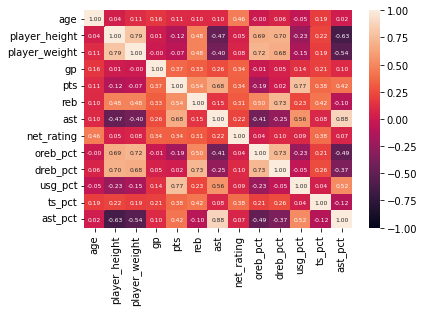

<Figure size 720x1440 with 0 Axes>

In [ ]:
corr_matrix_NBA_mx = NBA_mx.corr()
print(corr_matrix_NBA_mx)
sn.heatmap(corr_matrix_NBA_mx, annot=True, fmt='.2f', vmin=-1.0, vmax=1.0, annot_kws={"fontsize":6})
plt.figure(figsize=(10,20))
#display(plt.plot(x,y))

                 best_net_rating       age  player_height  player_weight  \
best_net_rating         1.000000 -0.051913       0.047311       0.028657   
age                    -0.051913  1.000000       0.011056       0.074835   
player_height           0.047311  0.011056       1.000000       0.779461   
player_weight           0.028657  0.074835       0.779461       1.000000   
gp                      0.292610 -0.108546      -0.004233      -0.022706   
pts                     0.151500 -0.245269      -0.109418      -0.109516   
reb                     0.186768 -0.140189       0.486998       0.446230   
ast                     0.078921 -0.161528      -0.541640      -0.501674   
oreb_pct                0.124275  0.050764       0.685762       0.722436   
dreb_pct                0.087740  0.023107       0.705794       0.675342   
usg_pct                 0.020720 -0.245977      -0.218252      -0.167479   
ts_pct                  0.181896  0.057522       0.227997       0.201155   
ast_pct     

<Figure size 720x1440 with 0 Axes>

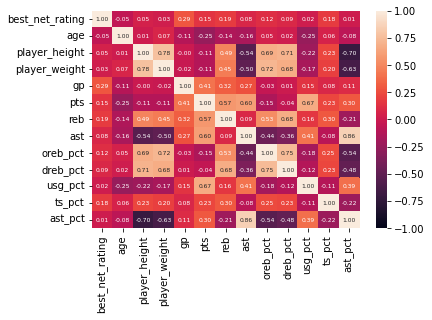

<Figure size 720x1440 with 0 Axes>

In [ ]:
corr_matrix_RPB = Rookie_Predict_Best.corr()
print(corr_matrix_RPB)
sn.heatmap(corr_matrix_RPB, annot=True, fmt='.2f', vmin=-1.0, vmax=1.0, annot_kws={"fontsize":6})
plt.figure(figsize=(10,20))
#display(plt.plot(x,y))

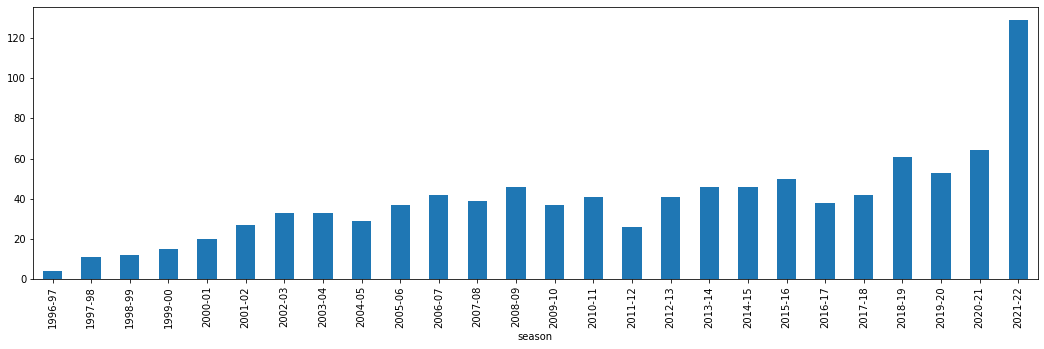

In [ ]:
#many players had their best season in 2021-2022 (issue because it reps many ppl who havent played long enough to have best season any other time?)
#scoreing is up in the NBA overall... more 3 pointers 
season=NBA_mx.groupby('season').count().player_name


plt.subplots(figsize=(18,5))
season.plot(kind='bar')

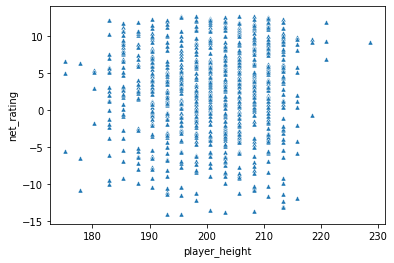

In [ ]:
#scatterplot between height and rating
sn.scatterplot(data=NBA_mx,x='player_height',y='net_rating', marker='^',s=25);

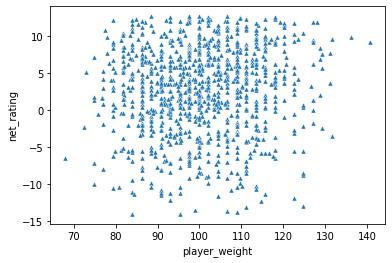

In [ ]:
#scatterplot between height and rating
sn.scatterplot(data=NBA_mx,x='player_weight',y='net_rating', marker='^',s=25);

(array([ 5.,  2.,  5., 10., 10., 10., 13., 14., 22., 23., 16., 32., 36.,
        28., 32., 46., 60., 57., 58., 62., 60., 58., 72., 54., 48., 47.,
        44., 32., 30., 36.]),
 array([-14.  , -13.11, -12.22, -11.33, -10.44,  -9.55,  -8.66,  -7.77,
         -6.88,  -5.99,  -5.1 ,  -4.21,  -3.32,  -2.43,  -1.54,  -0.65,
          0.24,   1.13,   2.02,   2.91,   3.8 ,   4.69,   5.58,   6.47,
          7.36,   8.25,   9.14,  10.03,  10.92,  11.81,  12.7 ]),
 <a list of 30 Patch objects>)

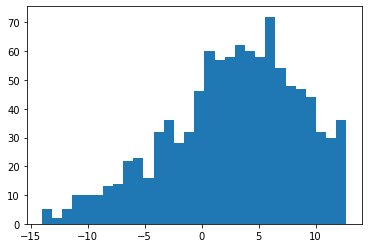

In [ ]:
plt.hist(NBA_mx['net_rating'], bins=30)

(array([ 12.,  30.,  49.,  71.,  96., 163., 180., 184., 139.,  98.]),
 array([-14.  , -11.33,  -8.66,  -5.99,  -3.32,  -0.65,   2.02,   4.69,
          7.36,  10.03,  12.7 ]),
 <a list of 10 Patch objects>)

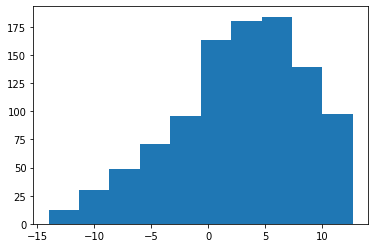

In [ ]:
plt.hist(NBA_mx['net_rating'])

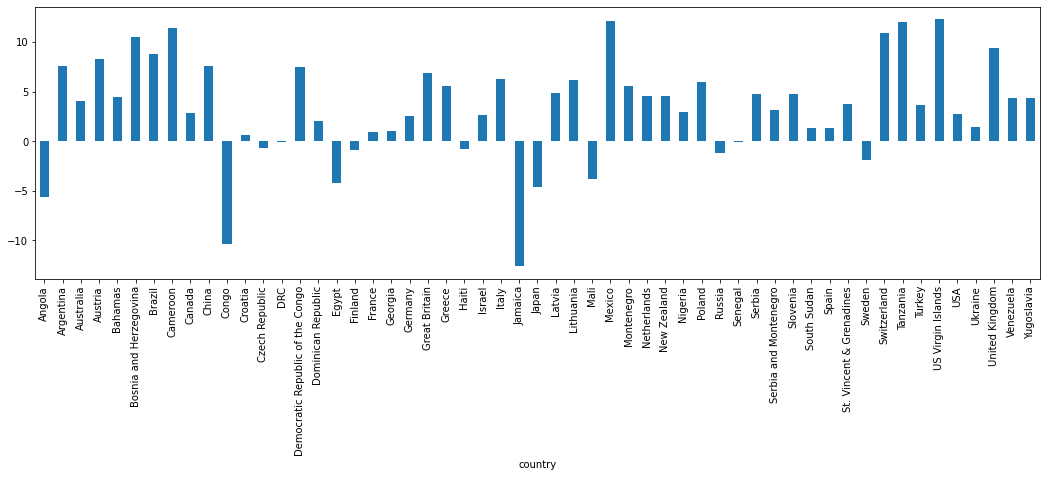

In [ ]:
country_rating_best=NBA_mx.groupby('country').mean().net_rating

plt.subplots(figsize=(18,5))
country_rating_best.plot(kind='bar')


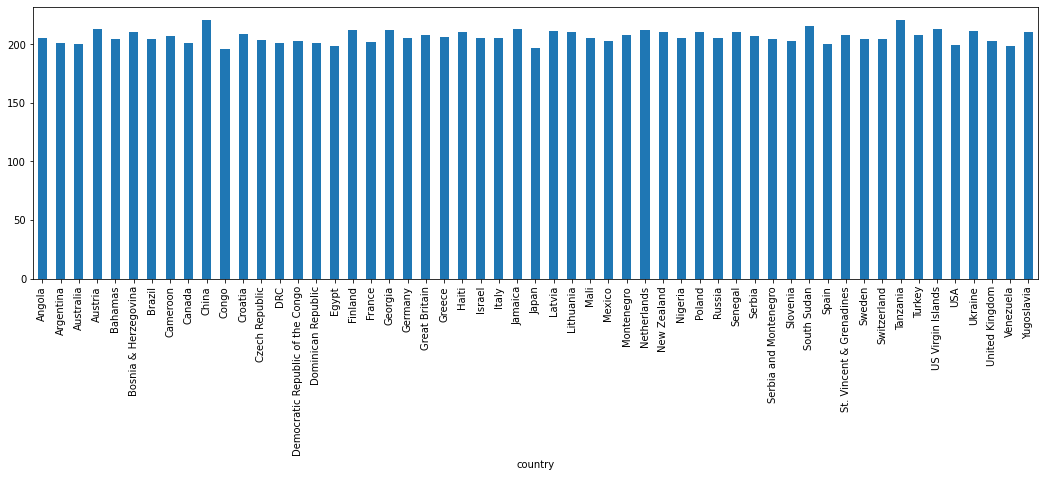

In [ ]:
country_height_rookie=Rookie_Predict_Best.groupby('country').mean().player_height

plt.subplots(figsize=(18,5))
country_height_rookie.plot(kind='bar')

Model attempts

In [ ]:
NBA_college_sum = NBA_mx[['player_name', 'college']].groupby('college').agg('count')
order = NBA_college_sum.sort_values(by="player_name", ascending=False).head(5)
order

,player_name
college,
None,177
Kentucky,50
Duke,41
Kansas,29
North Carolina,27


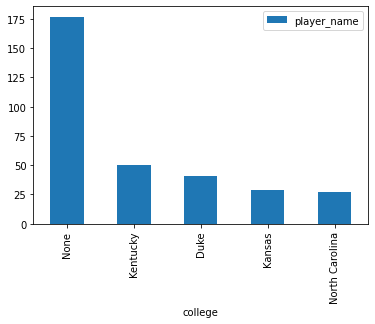

In [ ]:
order.plot(kind="bar")

In [ ]:
# drop ID and ZIP Code columns

# Education is coded as numerical but inherently is an ordered categorical variable
# We could recode it as categorical or leave it as is (won't matter much here)
# bank_df['Education'] = bank_df['Education'].astype('category')

# Define X (inputs/predictors) and y (output/outcome) 
X = Rookie_Predict_Best[['age', 'player_height', 'player_weight','gp', 'pts', 'reb', 'ast', 'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct','ast_pct']]
y = Rookie_Predict_Best['best_net_rating']

# Split data between training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

In [ ]:

clf = DecisionTreeRegressor(
      max_depth=3, #number of levels
      min_samples_split = 60, #number of samples in each node
      min_samples_leaf = 30, #leaf tree sample size
      )
clf.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, min_samples_leaf=30, min_samples_split=60)

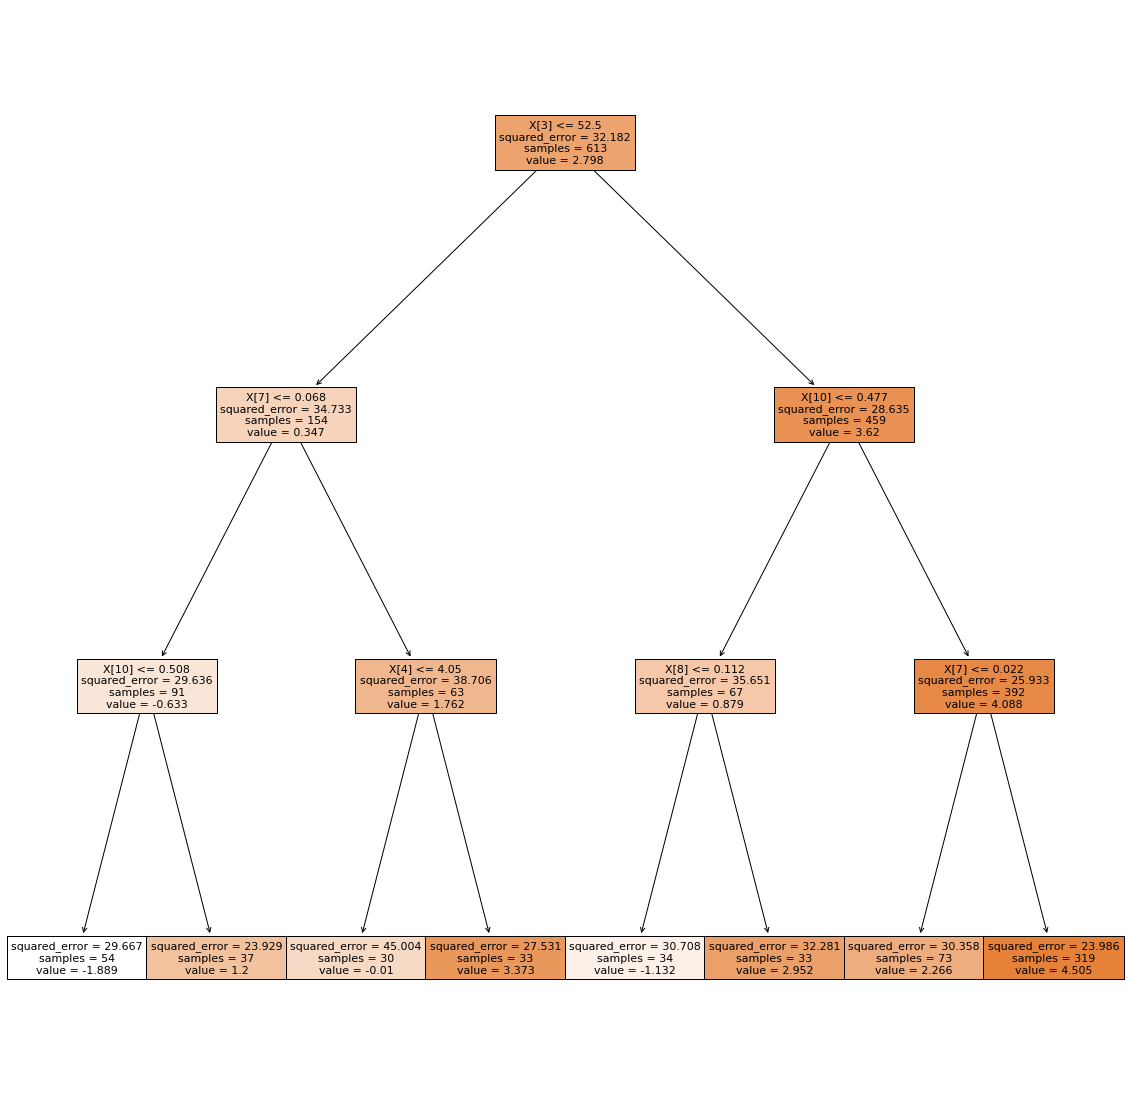

In [ ]:
#just for practice and to see if i could do it... not sure that its beneficial

plt.figure(figsize=(20,20))


tree.plot_tree(clf, filled=True);

In [ ]:
rookie=join_best_rating_only.rename(columns={"net_rating_x": "best_net_rating"})

rookie

rookie["best_net_rating"] = np.where(rookie["best_net_rating"] > 0, 1, 0)
rookie.head(50)


,player_name,best_net_rating,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,gp,pts,reb,ast,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Chris Robinson,0,VAN,23,195.58,90.718400,Western Kentucky,USA,1996,2,...,41,4.6,1.7,1.6,0.039,0.088,0.155,0.486,0.156,1996-97
1,Roy Rogers,0,VAN,23,208.28,106.594120,Alabama,USA,1996,1,...,82,6.6,4.7,0.6,0.088,0.155,0.154,0.518,0.042,1996-97
2,Travis Knight,1,LAL,22,213.36,106.594120,Connecticut,USA,1996,1,...,71,4.8,4.5,0.5,0.127,0.182,0.142,0.536,0.052,1996-97
3,John Wallace,1,NYK,23,205.74,102.058200,Syracuse,USA,1996,1,...,68,4.8,2.3,0.5,0.080,0.148,0.204,0.571,0.081,1996-97
4,Martin Muursepp,0,DAL,23,205.74,106.594120,None,USA,1996,1,...,41,5.7,2.8,0.7,0.085,0.133,0.179,0.528,0.079,1997-98
5,Mark Hendrickson,0,SAC,24,205.74,99.790240,Washington State,USA,1996,2,...,48,3.4,3.0,0.9,0.049,0.164,0.125,0.468,0.086,1997-98
6,Vitaly Potapenko,1,CLE,22,208.28,127.005760,Wright State,Ukraine,1996,1,...,80,5.8,2.7,0.5,0.106,0.119,0.234,0.486,0.064,1996-97
7,Rodrick Rhodes,0,HOU,24,198.12,102.058200,Southern California,USA,1997,1,...,58,5.8,1.2,1.9,0.030,0.047,0.200,0.439,0.175,1997-98
8,Reggie Geary,1,SAS,24,187.96,84.821704,Arizona,USA,1996,2,...,62,2.5,1.1,1.2,0.034,0.078,0.164,0.392,0.175,1997-98
9,Jerome Williams,1,DET,25,205.74,93.439952,Georgetown,USA,1996,1,...,77,5.3,4.9,0.6,0.155,0.185,0.147,0.568,0.061,1997-98


In [ ]:
rookie.shape

(1022, 21)

In [ ]:
Earliest=NBA_filtered.drop_duplicates(subset='player_name',
                     keep ='first', inplace=False)   
Earliest["net_rating"] = np.where(Earliest["net_rating"] > 0, 1, 0)
Earliest["college"] = np.where(Earliest["college"] == "None", 0, 1)

Earliest.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1022 entries, 21 to 12258
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   player_name        1022 non-null   object 
 1   team_abbreviation  1022 non-null   object 
 2   age                1022 non-null   int64  
 3   player_height      1022 non-null   float64
 4   player_weight      1022 non-null   float64
 5   college            1022 non-null   int64  
 6   country            1022 non-null   object 
 7   draft_year         1022 non-null   object 
 8   draft_round        1022 non-null   object 
 9   draft_number       1022 non-null   object 
 10  gp                 1022 non-null   int64  
 11  pts                1022 non-null   float64
 12  reb                1022 non-null   float64
 13  ast                1022 non-null   float64
 14  net_rating         1022 non-null   int64  
 15  oreb_pct           1022 non-null   float64
 16  dreb_pct           102

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
Earliest['net_rating'] = Earliest['net_rating'].astype('category')
Earliest['college'] = Earliest['college'].astype('category')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
x = Earliest[['age', 'player_height','college']]
y = Earliest['net_rating']

# Split data between training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [ ]:
clf2 = DecisionTreeClassifier(
    max_depth=10, #number of levels
   min_samples_split =200,
      min_samples_leaf = 100,
      min_impurity_decrease = 0.001, #goal is to make purer nodes
      criterion = 'gini') #number of samples in each node
  #leaf tree sample size #goal is to make purer nodes
clf2.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=10, min_impurity_decrease=0.001,
                       min_samples_leaf=100, min_samples_split=200)

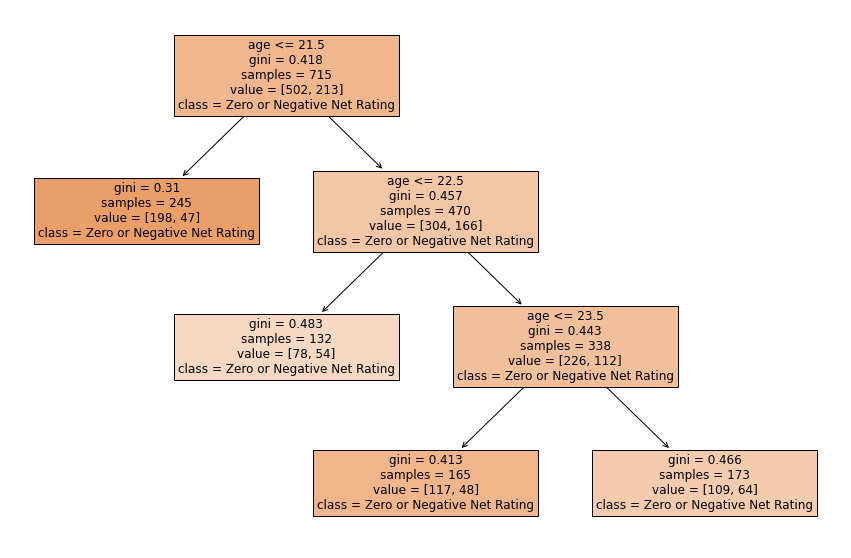

In [ ]:
fig = plt.figure(figsize=(15,10))
# define class names
cnames = ['Zero or Negative Net Rating','Positive Net Rating'] 
tree.plot_tree(clf2, fontsize=12, feature_names=x.columns, class_names=cnames, filled=True);

In [ ]:
y_pred_train = clf2.predict(x_train)
y_pred_test = clf2.predict(x_test)

print("Accuracy score of reduced tree on train data:", accuracy_score(y_train, y_pred_train)*100, "%")
print("Accuracy score of reduced tree on test data:", accuracy_score(y_test, y_pred_test)*100, "%")


Accuracy score of reduced tree on train data: 70.20979020979021 %
Accuracy score of reduced tree on test data: 70.68403908794788 %


In [ ]:
# We create lists of all the values we want to search over
# This is called 'creating a grid'
param_grid = {
    'max_depth': [10, 15, 20, 30, 40], 
    'min_samples_leaf': [10, 15, 50, 100 , 110, 120, 130, 140, 150, 200, 250, 300],
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01], 
}

# Then, use the GridSearchCV function which combines gridsearch with 
# K-fold cross validation (cv parameter)
gridSearch = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring = 'accuracy')
gridSearch.fit(x_train, y_train)

print('Best accuracy: ', gridSearch.best_score_)
print('Parameter values to achieve best accuracy: ', gridSearch.best_params_)

Best accuracy:  0.702097902097902
Parameter values to achieve best accuracy:  {'max_depth': 10, 'min_impurity_decrease': 0, 'min_samples_leaf': 100}


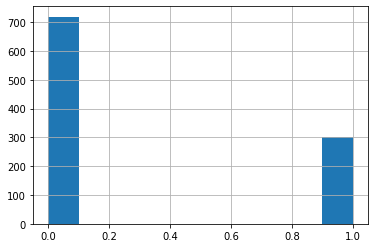

In [ ]:
Earliest['net_rating'].hist()

In [ ]:
best['net_rating'].hist()

NameError: ignored

In [ ]:
best=NBA_filtered.sort_values('net_rating', ascending=False).drop_duplicates('player_name').sort_index()

best["net_rating"] = np.where(best["net_rating"] > 0, 1, 0)
best["college"] = np.where(best["college"] == "None", 0, 1)

best.info()

best['net_rating'] = best['net_rating'].astype('category')
best['college'] = best['college'].astype('category')

In [ ]:
param_grid = {
    'max_depth': [10, 20, 30, 40], 
   
    'min_samples_leaf': [10, 50, 100 , 150, 200, 250, 300],
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01], 
}

# Then, use the GridSearchCV function which combines gridsearch with 
# K-fold cross validation (cv parameter)
gridSearch = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring = 'accuracy')
gridSearch.fit(X_train, y_train)

print('Best accuracy: ', gridSearch.best_score_)
print('Parameter values to achieve best accuracy: ', gridSearch.best_params_)

In [ ]:
x = best[['age', 'player_height', 'player_weight','college']]
y = best['net_rating']

# Split data between training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=1)

In [ ]:
clf3 = DecisionTreeClassifier(
    max_depth=10, #number of levels
   
      min_samples_leaf = 50,
      min_impurity_decrease = 0.005, #goal is to make purer nodes
      criterion = 'gini') #number of samples in each node
  #leaf tree sample size #goal is to make purer nodes
clf3.fit(X_train, y_train)

In [ ]:
fig = plt.figure(figsize=(15,10))
# define class names
cnames = ['Zero or Negative Net Rating','Positive Net Rating'] 
tree.plot_tree(clf2, fontsize=12, feature_names=x.columns, class_names=cnames, filled=True);

In [ ]:
NBA_filtered.sort_values('net_rating', ascending=False).drop_duplicates('player_name').sort_index()

In [ ]:
x = rookie[['age', 'player_height', 'player_weight']]
y = rookie['best_net_rating']

# Split data between training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=1)

In [ ]:
fig = plt.figure(figsize=(15,10))
# define class names
cnames = ['Zero or Negative Net Rating','Positive Net Rating'] 
tree.plot_tree(clf2, fontsize=12, feature_names=X.columns, class_names=cnames, filled=True);


In [ ]:
clf2 = DecisionTreeClassifier(
    max_depth=30, #number of levels
      min_samples_split = 50,
      min_samples_leaf = 50,
      min_impurity_decrease = 0.00005, #goal is to make purer nodes
      criterion = 'gini') #number of samples in each node
  #leaf tree sample size #goal is to make purer nodes
clf2.fit(X_train, y_train)

In [ ]:
Earliest_yr.shape

In [ ]:
x = Earliest_yr[['age', 'player_height', 'player_weight']]
y = Earliest_yr['net_rating']

# Split data between training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=1)

In [ ]:
clf2 = DecisionTreeClassifier(
    max_depth=30, #number of levels
      min_samples_split = 50,
      min_samples_leaf = 50,
      min_impurity_decrease = 0.00005, #goal is to make purer nodes
      criterion = 'gini') #number of samples in each node
  #leaf tree sample size #goal is to make purer nodes
clf2.fit(X_train, y_train)

logistic regression

In [ ]:
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

In [ ]:
#College_or_Not= NBA_mx['college'].replace({'None': 0})
#College_or_Not.head()
College_Or_Not=NBA_filtered.sort_values('net_rating', ascending=False).drop_duplicates('player_name').sort_index()
College_Or_Not.info()


In [ ]:
College_Or_Not["college"] = np.where(College_Or_Not["college"] == "None", 0, 1)
College_Or_Not.head(25)

In [ ]:
#games played, rebounds, assists, net rating 

College_Or_Not['college'] = College_Or_Not['college'].astype('category')

y = College_Or_Not['college']
X = College_Or_Not[['gp', 'pts','reb', 'ast', 'net_rating']]


In [ ]:
# Stratify on:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.4, random_state = 1, stratify = y)
print( "Number of 1's in training set:", sum(y_train))
print( "Number of 1's in testing set:", sum(y_test))
print( "Proportion of 1's in testing set", sum(y_test)/(sum(y_train)+sum(y_test)))

In [ ]:
lr = LogisticRegression(penalty="none", solver='lbfgs')
lr.fit(X_train, y_train)

In [ ]:
# Make predictions on test data
y_pred = lr.predict(X_test)

In [ ]:
confusion_matrix(y_test,y_pred)
#out of 30 admins in test data, 2 are predicted as non-completers but are completers in reality

In [ ]:
accuracy_score(y_test, y_pred)

In [ ]:
confusion_matrix(y_test,y_pred_new)

In [ ]:
accuracy_score(y_test, y_pred_new)

In [ ]:
# Store coefficients
lr_int = lr.intercept_[0]
lr_coef = lr.coef_[0]

# print coefficients
print('intercept ', lr_int)
print(pd.DataFrame({'coeff': lr_coef}, index=X.columns))

In [ ]:
print( math.exp(lr_coef[0]) )
print( math.exp(lr_coef[1]) )
print( math.exp(lr_coef[2]) )
print( math.exp(lr_coef[3]) )
print( math.exp(lr_coef[4]) )

#this basically says that the better you ply during your best year in regards to gp, pts, reb, asts, net rating says nothing about if you went to school

In [ ]:
# import statspackage
import statsmodels.api as sm

# note: statsmodels is missing the constant term in the sigmoid, 
# so we need to add it back...
X_train_with_constant = sm.add_constant(X_train)
X_test_with_constant = sm.add_constant(X_test)

logit_reg = sm.Logit(y_train, X_train_with_constant).fit()
print(logit_reg.params)
print(logit_reg.summary())

In [ ]:
#failed attempt to find 

#clf.score(x_train, y_train)

In [ ]:
NBA_mx[''].replace('a', None)

End of my clean code

In [ ]:
#failed attempt at a boxplot

country=NBA_mx[['country', 'net_rating']]

country.head()
columns1=['country', 'net_rating']
df1 = pd.DataFrame(country, columns=columns1)
df1.head(25)

sn.boxplot(x="country", y="net_rating", data=pd.melt(df1))

plt.show()

In [ ]:
country_weight_rookie=NBA_mx.groupby('country').mean().player_weight

plt.subplots(figsize=(18,5))
country_weight_rookie.plot(kind='bar')

STARTING HERE:

In [ ]:
Earliest_yr

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
21,Erick Dampier,IND,21,210.82,120.201880,Mississippi State,USA,1996,1,10,...,5.1,4.1,0.6,-2.0,0.107,0.216,0.218,0.451,0.074,1996-97
30,Derek Fisher,LAL,22,185.42,90.718400,Arkansas-Little Rock,USA,1996,1,24,...,3.9,1.2,1.5,5.1,0.031,0.087,0.186,0.491,0.223,1996-97
68,Jamie Feick,SAS,22,203.20,115.665960,Michigan State,USA,1996,2,48,...,3.7,5.2,0.6,-12.2,0.133,0.253,0.150,0.405,0.065,1996-97
78,Jermaine O'Neal,POR,18,210.82,102.511792,None,USA,1996,1,17,...,4.1,2.8,0.2,1.3,0.099,0.198,0.199,0.494,0.030,1996-97
147,Allen Iverson,PHI,22,182.88,74.842680,Georgetown,USA,1996,1,1,...,23.5,4.1,7.5,-7.0,0.040,0.072,0.284,0.513,0.320,1996-97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12201,Josh Christopher,HOU,20,190.50,97.522280,Arizona State,USA,2021,1,24,...,7.9,2.5,2.0,-9.2,0.037,0.103,0.205,0.534,0.170,2021-22
12205,Jordan Nwora,MIL,23,203.20,102.058200,Louisville,USA,2020,2,45,...,7.9,3.6,1.0,-3.0,0.030,0.147,0.187,0.506,0.071,2021-22
12233,Moses Moody,GSW,20,195.58,95.707912,Arkansas,USA,2021,1,14,...,4.4,1.5,0.4,-4.0,0.028,0.098,0.148,0.573,0.056,2021-22
12257,Nick Richards,CHA,24,213.36,111.130040,Kentucky,Jamaica,2020,2,42,...,3.0,1.7,0.3,-13.0,0.086,0.137,0.147,0.689,0.054,2021-22


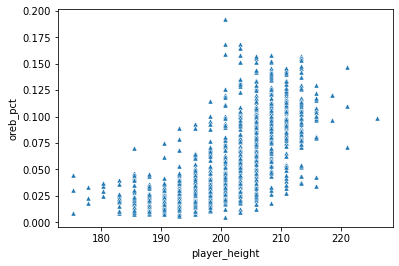

In [ ]:
sn.scatterplot(data=Earliest_yr,x='player_height',y='oreb_pct', marker='^',s=25);

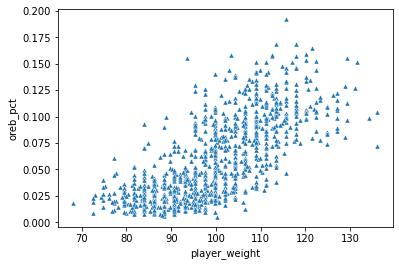

In [ ]:
sn.scatterplot(data=Earliest_yr,x='player_weight',y='oreb_pct', marker='^',s=25);

In [ ]:
sn.scatterplot(data=Earliest_yr,x='player_weight',y='ast', marker='^',s=25);

In [ ]:
sn.scatterplot(data=Earliest_yr,x='player_height',y='ast', marker='^',s=25);

In [ ]:
sn.scatterplot(data=Earliest_yr,x='player_weight',y='reb', marker='^',s=25);

In [ ]:
sn.scatterplot(data=Earliest_yr,x='player_height',y='reb', marker='^',s=25);

In [ ]:
sn.scatterplot(data=Earliest_yr,x='player_height',y='dreb_pct', marker='^',s=25);

In [ ]:
sn.scatterplot(data=Earliest_yr,x='player_weight',y='dreb_pct', marker='^',s=25);

In [ ]:
sn.scatterplot(data=Earliest_yr,x='player_height',y='ts_pct', marker='^',s=25);

In [ ]:
sn.scatterplot(data=Earliest_yr,x='player_weight',y='ts_pct', marker='^',s=25);

NEURAL NETWORK

In [ ]:
import matplotlib.pylab as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor #this is the neural network part

!pip install -U dmba;
from dmba import regressionSummary


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# select relevant variables, Price and 15 predictors
selected_var = ['player_height', 'player_weight', 'oreb_pct', 'ts_pct', 'dreb_pct', 'reb', 'ast', 'usg_pct', 'ast_pct']
rookie_df = Earliest_yr[selected_var]

In [ ]:
rookie_df = pd.get_dummies(rookie_df, columns=['player_height','player_weight'], drop_first=True)
rookie_df.head()

,oreb_pct,ts_pct,dreb_pct,reb,ast,usg_pct,ast_pct,player_height_177.8,player_height_180.34,player_height_182.88,...,player_weight_123.377024,player_weight_124.7378,player_weight_126.098576,player_weight_127.00576,player_weight_128.820128,player_weight_129.27372,player_weight_131.088088,player_weight_131.54168,player_weight_134.263232,player_weight_136.0776
21,0.107,0.451,0.216,4.1,0.6,0.218,0.074,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30,0.031,0.491,0.087,1.2,1.5,0.186,0.223,0,0,0,...,0,0,0,0,0,0,0,0,0,0
68,0.133,0.405,0.253,5.2,0.6,0.150,0.065,0,0,0,...,0,0,0,0,0,0,0,0,0,0
78,0.099,0.494,0.198,2.8,0.2,0.199,0.030,0,0,0,...,0,0,0,0,0,0,0,0,0,0
147,0.040,0.513,0.072,4.1,7.5,0.284,0.320,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y_nonscaled = rookie_df[['usg_pct']]
X_nonscaled = rookie_df.drop(columns=['usg_pct'])
X_nonscaled.head()

,oreb_pct,ts_pct,dreb_pct,reb,ast,ast_pct,player_height_177.8,player_height_180.34,player_height_182.88,player_height_185.42,...,player_weight_123.377024,player_weight_124.7378,player_weight_126.098576,player_weight_127.00576,player_weight_128.820128,player_weight_129.27372,player_weight_131.088088,player_weight_131.54168,player_weight_134.263232,player_weight_136.0776
21,0.107,0.451,0.216,4.1,0.6,0.074,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30,0.031,0.491,0.087,1.2,1.5,0.223,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
68,0.133,0.405,0.253,5.2,0.6,0.065,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
78,0.099,0.494,0.198,2.8,0.2,0.030,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
147,0.040,0.513,0.072,4.1,7.5,0.320,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# normalize the data into [0,1] range
# MinMax = (X - Xmin) / (Xmax - Xmin)
scaleOutput = MinMaxScaler()
scaleInput = MinMaxScaler()

y = scaleOutput.fit_transform(y_nonscaled)
X = scaleInput.fit_transform(X_nonscaled)

# partition data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
rookie_nnet = MLPRegressor(hidden_layer_sizes=(2), activation='logistic', solver='lbfgs', random_state=1)
rookie_nnet.fit(X_train, y_train.ravel())

MLPRegressor(activation='logistic', hidden_layer_sizes=2, random_state=1,
             solver='lbfgs')

In [ ]:
y_pred = rookie_nnet.predict(X_train)

In [ ]:
print('min predicted oreb%:',  min(y_pred), "max predicted oreb%", max(y_pred))

min predicted oreb%: 0.21133947994671687 max predicted oreb% 0.7822416569120078


In [ ]:
# predict and compute RMSE for validation set
print('\nValidation data (2)')
y_actual = scaleOutput.inverse_transform(y_valid).ravel()
y_pred = scaleOutput.inverse_transform([rookie_nnet.predict(X_valid)]).ravel()
regressionSummary(y_pred, y_actual)

# plot predicted vs actual values
pd.DataFrame({'actual': y_actual, 'predicted': y_pred}).plot.scatter(x='actual', y='predicted', alpha=0.5)
plt.plot([0, 0.4], [0, 0.4], color='C1');


Validation data (2)

Regression statistics

                      Mean Error (ME) : 0.0002
       Root Mean Squared Error (RMSE) : 0.0362
            Mean Absolute Error (MAE) : 0.0288
          Mean Percentage Error (MPE) : -0.5003
Mean Absolute Percentage Error (MAPE) : 16.0833
